In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing  import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv('cars_dataset.csv')

In [3]:
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
72430,I30,2016,8680,Manual,25906,Diesel,0.0,78.4,1.6,Hyundai
72431,I40,2015,7830,Manual,59508,Diesel,30.0,65.7,1.7,Hyundai
72432,I10,2017,6830,Manual,13810,Petrol,20.0,60.1,1.0,Hyundai
72433,Tucson,2018,13994,Manual,23313,Petrol,145.0,44.8,1.6,Hyundai


In [4]:
def value(data):
    cols = ['model', 'transmission', 'fuelType', 'Make']
    for i in cols:
        print(data[i].value_counts())
        print('----------------')
value(data)

 Fiesta             6556
 Golf               4863
 Focus              4588
 Polo               3287
 3 Series           2443
                    ... 
 RS7                   1
 Escort                1
 Accent                1
 Transit Tourneo       1
 Amica                 1
Name: model, Length: 146, dtype: int64
----------------
Manual       43021
Semi-Auto    15364
Automatic    14046
Other            4
Name: transmission, dtype: int64
----------------
Petrol      40370
Diesel      28918
Hybrid       2903
Other         239
Electric        5
Name: fuelType, dtype: int64
----------------
Ford       17964
vw         15157
BMW        10781
audi       10668
toyota      6738
skoda       6267
Hyundai     4860
Name: Make, dtype: int64
----------------


In [5]:
np.shape(data)

(72435, 10)

In [6]:
len(data['model'].unique())

146

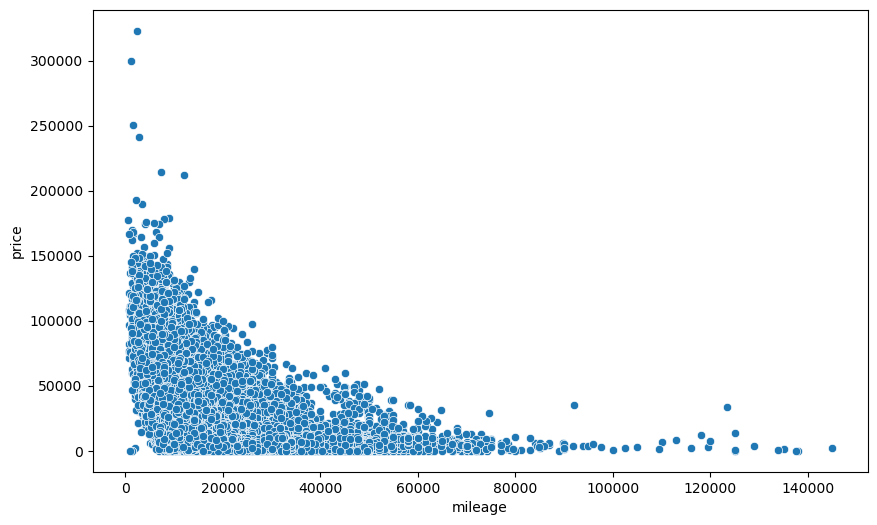

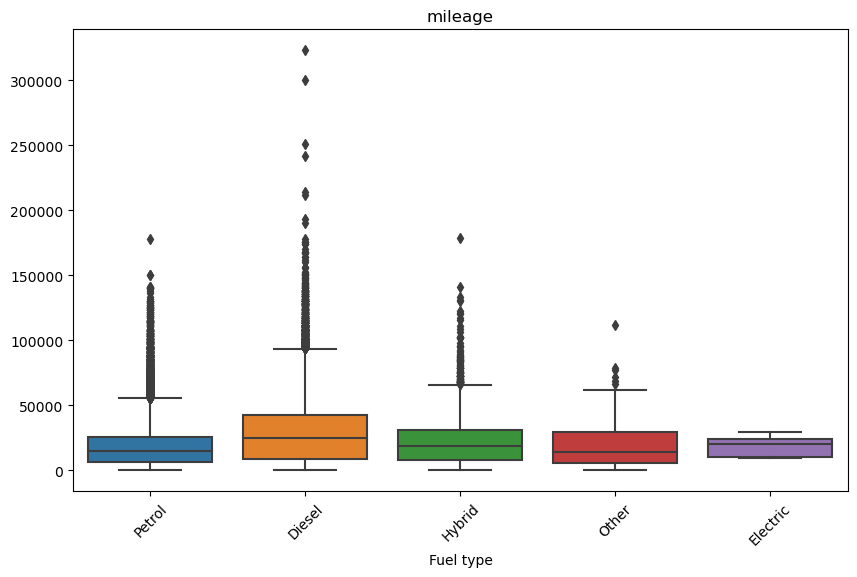

In [7]:
# Visualizar la relación entre "price " y "milage"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='mileage', data=data)
plt.xlabel('mileage')
plt.ylabel('price')
plt.show()

#fueltype and milage
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuelType', y='mileage', data=data)
plt.xticks(rotation=45)
plt.title('mileage')
plt.xlabel('Fuel type')
plt.ylabel('')
plt.show()

In [8]:
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Make            0
dtype: int64

In [9]:
data['model'].unique()

array([' A1', ' A6', ' A4', ' A3', ' Q3', ' Q5', ' A5', ' S4', ' Q2',
       ' A7', ' TT', ' Q7', ' RS6', ' RS3', ' A8', ' Q8', ' RS4', ' RS5',
       ' R8', ' SQ5', ' S8', ' SQ7', ' S3', ' S5', ' A2', ' RS7',
       ' 5 Series', ' 6 Series', ' 1 Series', ' 7 Series', ' 2 Series',
       ' 4 Series', ' X3', ' 3 Series', ' X5', ' X4', ' i3', ' X1', ' M4',
       ' X2', ' X6', ' 8 Series', ' Z4', ' X7', ' M5', ' i8', ' M2',
       ' M3', ' M6', ' Z3', ' Fiesta', ' Focus', ' Puma', ' Kuga',
       ' EcoSport', ' C-MAX', ' Mondeo', ' Ka+', ' Tourneo Custom',
       ' S-MAX', ' B-MAX', ' Edge', ' Tourneo Connect', ' Grand C-MAX',
       ' KA', ' Galaxy', ' Mustang', ' Grand Tourneo Connect', ' Fusion',
       ' Ranger', ' Streetka', ' Escort', ' Transit Tourneo', ' T-Roc',
       ' Golf', ' Passat', ' T-Cross', ' Polo', ' Tiguan', ' Sharan',
       ' Up', ' Scirocco', ' Beetle', ' Caddy Maxi Life', ' Caravelle',
       ' Touareg', ' Arteon', ' Touran', ' Golf SV', ' Amarok',
       ' Tiguan

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72435 entries, 0 to 72434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         72435 non-null  object 
 1   year          72435 non-null  int64  
 2   price         72435 non-null  int64  
 3   transmission  72435 non-null  object 
 4   mileage       72435 non-null  int64  
 5   fuelType      72435 non-null  object 
 6   tax           72435 non-null  float64
 7   mpg           72435 non-null  float64
 8   engineSize    72435 non-null  float64
 9   Make          72435 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [11]:
en1= LabelEncoder()
en2= LabelEncoder()
en3= LabelEncoder()
en4= LabelEncoder()

std = StandardScaler()


In [12]:
en1.fit(data['model'])
en2.fit(data['transmission'])
en3.fit(data['fuelType'])
en4.fit(data['Make'])

data['model'] = en1.transform(data['model'])
data['transmission'] = en2.transform(data['transmission'])
data['fuelType'] = en3.transform(data['fuelType'])
data['Make'] = en4.transform(data['Make'])


In [13]:
data['model'].unique()

array([  8,  13,  11,  10,  86,  87,  12, 102,  85,  14, 117,  88,  95,
        92,  15,  89,  93,  94,  90, 105, 104, 106, 101, 103,   9,  96,
         4,   5,   0,   6,   1,   3, 134,   2, 136, 135, 144, 132,  74,
       133, 137,   7, 143, 138,  75, 145,  72,  73,  76, 142,  42,  43,
        84,  70,  37,  26,  77,  65, 124, 100,  23,  38, 123,  51,  64,
        47,  78,  52,  45,  97, 112,  40, 125, 116,  49,  81, 115,  82,
       119, 110, 127, 109,  24,  31,  34, 121,  19, 122,  50,  17, 120,
       111,  63,  27,  32,  29,  28,  30,  39,  44,  46,  36,  91, 139,
        20,  22,  25,  83,  21, 130,  53,  80,  71, 114,  33, 131,  59,
       128,  79,  35, 141, 113,  68,  98,  67,  41, 140, 108,  99,  66,
        55, 126,  54,  61,  56,  57,  62,  69, 129,  58,  60, 107,  16,
       118,  48,  18])

In [14]:
X,Y = data.iloc[:,:-1], data.iloc[:,-1]

In [15]:
X

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,8,2017,12500,1,15735,4,150.0,55.4,1.4
1,13,2016,16500,0,36203,0,20.0,64.2,2.0
2,8,2016,11000,1,29946,4,30.0,55.4,1.4
3,11,2017,16800,0,25952,0,145.0,67.3,2.0
4,10,2019,17300,1,1998,4,145.0,49.6,1.0
...,...,...,...,...,...,...,...,...,...
72430,56,2016,8680,1,25906,0,0.0,78.4,1.6
72431,57,2015,7830,1,59508,0,30.0,65.7,1.7
72432,54,2017,6830,1,13810,4,20.0,60.1,1.0
72433,126,2018,13994,1,23313,4,145.0,44.8,1.6


In [16]:
data['Make'].value_counts()

1    17964
6    15157
0    10781
3    10668
5     6738
4     6267
2     4860
Name: Make, dtype: int64

In [17]:
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,8,2017,12500,1,15735,4,150.0,55.4,1.4,3
1,13,2016,16500,0,36203,0,20.0,64.2,2.0,3
2,8,2016,11000,1,29946,4,30.0,55.4,1.4,3
3,11,2017,16800,0,25952,0,145.0,67.3,2.0,3
4,10,2019,17300,1,1998,4,145.0,49.6,1.0,3
...,...,...,...,...,...,...,...,...,...,...
72430,56,2016,8680,1,25906,0,0.0,78.4,1.6,2
72431,57,2015,7830,1,59508,0,30.0,65.7,1.7,2
72432,54,2017,6830,1,13810,4,20.0,60.1,1.0,2
72433,126,2018,13994,1,23313,4,145.0,44.8,1.6,2


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72435 entries, 0 to 72434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         72435 non-null  int32  
 1   year          72435 non-null  int64  
 2   price         72435 non-null  int64  
 3   transmission  72435 non-null  int32  
 4   mileage       72435 non-null  int64  
 5   fuelType      72435 non-null  int32  
 6   tax           72435 non-null  float64
 7   mpg           72435 non-null  float64
 8   engineSize    72435 non-null  float64
 9   Make          72435 non-null  int32  
dtypes: float64(3), int32(4), int64(3)
memory usage: 4.4 MB


In [19]:
Y

0        3
1        3
2        3
3        3
4        3
        ..
72430    2
72431    2
72432    2
72433    2
72434    2
Name: Make, Length: 72435, dtype: int32

In [20]:
std = StandardScaler()
std.fit(X)
X_std = std.transform(X)

In [21]:
X_std

array([[-1.22374707, -0.03505841, -0.43877559, ...,  0.51598948,
        -0.02643876, -0.41965607],
       [-1.10247317, -0.51096846, -0.00862018, ..., -1.51383041,
         0.48775194,  0.64885128],
       [-1.22374707, -0.51096846, -0.60008388, ..., -1.35769042,
        -0.02643876, -0.41965607],
       ...,
       [-0.10802727, -0.03505841, -1.0485209 , ..., -1.51383041,
         0.24818582, -1.13199431],
       [ 1.63831676,  0.44085164, -0.27811255, ...,  0.43791949,
        -0.64580484, -0.06348695],
       [ 1.63831676, -0.51096846, -0.06249714, ...,  0.1256395 ,
         0.10210892,  0.1145976 ]])

In [22]:
X_train,Xtest, Ytrain, Ytest = train_test_split(X_std,Y, train_size=0.75,random_state=45, shuffle=True, stratify=Y)

In [23]:
X_train.shape,Ytrain.shape,Xtest.shape,Ytest.shape

((54326, 9), (54326,), (18109, 9), (18109,))

In [24]:
model = KNeighborsClassifier()
model.fit(X_train,Ytrain)

KNeighborsClassifier()

In [25]:
prediction = model.predict(X_train)
train_report = classification_report(prediction,Ytrain)

In [26]:
print(train_report)

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      8342
           1       0.97      0.94      0.96     13877
           2       0.93      0.95      0.94      3572
           3       0.93      0.93      0.93      7967
           4       0.88      0.94      0.91      4394
           5       0.95      0.98      0.97      4916
           6       0.93      0.94      0.94     11258

    accuracy                           0.94     54326
   macro avg       0.94      0.95      0.94     54326
weighted avg       0.95      0.94      0.94     54326



In [27]:
prediction1 = model.predict(Xtest)
test_report = classification_report(prediction1, Ytest)

In [28]:
print(test_report)

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2812
           1       0.96      0.91      0.93      4708
           2       0.91      0.92      0.91      1190
           3       0.89      0.91      0.90      2605
           4       0.82      0.91      0.86      1415
           5       0.94      0.97      0.95      1630
           6       0.90      0.91      0.91      3749

    accuracy                           0.92     18109
   macro avg       0.91      0.92      0.91     18109
weighted avg       0.92      0.92      0.92     18109

